In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
import sklearn
import datetime
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

# 缺失值处理
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Cust_Info = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_Cust_Info.txt", sep='|',header=None, names=["Customer_id", "age", "FirstContactDay", "PBK_Ind", "HIB_Status", "OccuCode", "OccuDesc", "Gender", "Cntry_Correspondense", "InterCorpACIndicator", "NationCode", "IncomeLevel", "Salary", "Period_Salary", "Marital_Status", "Number_Children", "Education_Level", "Home_Ownership", "Car_Ownership", "Cust_Segment", "BusSector", "BusDesc"])
# Assign Different Customer segments different values
# A: Premier & Jade; B: advance; C: mass; D: credit card only
Cust_Info['Cust_Segment'].replace('Attrition',0,inplace=True)
Cust_Info['Cust_Segment'].replace('C',1,inplace=True)
Cust_Info['Cust_Segment'].replace('D',2,inplace=True)
Cust_Info['Cust_Segment'].replace('B',3,inplace=True)
Cust_Info['Cust_Segment'].replace('A',4,inplace=True)

# Assign gender: 1 to male;  0 to female
Cust_Info['Gender'].replace('M',1,inplace=True)
Cust_Info['Gender'].replace('F',0,inplace=True)

# Assign 1 to hold overseas HSBC account; 0 otherwise
Cust_Info['InterCorpACIndicator'].replace('Y  ',1,inplace=True)
Cust_Info['InterCorpACIndicator'].replace('N  ',0,inplace=True)

# Calculate how long do the customer contact HSBC
Cust_Info['YearsAfterFirstContact'] = 2018 - Cust_Info['FirstContactDay']//10000

In [ ]:
DDTN = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_DDTNJNP.txt", sep='|',header=None, encoding = 'gb18030', names=["Customer_id", "Acct_id", "Transaction date", "Transaction currency", "Transaction amount", "Transaction amount RMB", "Transaction amount original currency", "Transaction type", "product_code"])
DDacct = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_DD_Acct_20170630.txt", sep='|',header=None, encoding = 'gb18030', names=["Product type", "Customer_id", "Acct_id", "Account open date", "Account currency", "Account original currency", "Balance original currency", "Balance RMB", "Month average balance"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Cust_Info

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,NationCode,IncomeLevel,Salary,Period_Salary,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc,YearsAfterFirstContact
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,0.0,CN,0,CN,6,25000.0,M,2.0,0.0,NaN,NaN,Y,0,00130,OTHERS ...,9
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,CN,8,80000.0,M,NaN,0.0,NaN,NaN,NaN,4,00275,RECREATION ...,1
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,CN,5,10000.0,M,NaN,0.0,NaN,NaN,NaN,0,NaN,NaN,2
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,1.0,CN,0,CN,7,30000.0,M,NaN,0.0,NaN,NaN,NaN,0,00194,OTHER FINANCIAL INDUSTRY ...,5
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,1.0,CN,0,CN,5,200000.0,Y,2.0,0.0,4.0,1.0,NaN,2,,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300034,500999800856528,48.0,20170817,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,TW,9,30000.0,M,NaN,0.0,NaN,NaN,NaN,4,00405,AIRLINE TRANSPORTATION ...,1
300035,500999800106832,NaN,20111008,0,NaN,NaN,NaN,NaN,CN,0,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,,NaN,7
300036,500999800200458,30.0,20151207,0,NaN,16.0,OTHER,1.0,CN,0,CN,4,9000.0,M,NaN,0.0,NaN,NaN,NaN,0,00130,OTHERS ...,3
300037,500999800193136,37.0,20150202,1,NaN,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,CN,6,20000.0,M,NaN,0.0,NaN,NaN,NaN,4,00130,OTHERS ...,3


In [ ]:
filtered_cust_info = Cust_Info[["Customer_id", 'Cust_Segment', "age", 'Gender', 'PBK_Ind', 'InterCorpACIndicator', 'YearsAfterFirstContact', 'IncomeLevel', "Number_Children"]]
# filling in missing values
# imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # mean
# imp = imp.fit(filtered_cust_info[['age','Gender']])
# filtered_cust_info[['age','Gender']] = imp.transform(filtered_cust_info[['age','Gender']])
# filtered_cust_info

In [ ]:
Credit_Card_value = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/Credit_Card_value.csv", sep=',')# ,header=None) #, names=["Customer_id", "CARD_PLAN", "CARDHOLDER", "PBK_Ind", "HIB_Status", "OccuCode", "OccuDesc", "Gender", "Cntry_Correspondense", "InterCorpACIndicator", "NationCode", "IncomeLevel", "Salary", "Period_Salary", "Marital_Status", "Number_Children", "Education_Level", "Home_Ownership", "Car_Ownership", "Cust_Segment", "BusSector", "BusDesc"])
Credit_Card_value = Credit_Card_value.drop(['Unnamed: 0'],axis=1)
Credit_Card_value['credit_or_not'] = [1] * Credit_Card_value.shape[0]

In [ ]:
Merged = filtered_cust_info.merge(Credit_Card_value,how='left',on='Customer_id')
Merged = Merged.drop(['tenure'], axis = 1)

In [ ]:
Merged

,Customer_id,Cust_Segment,age,Gender,PBK_Ind,InterCorpACIndicator,YearsAfterFirstContact,IncomeLevel,Number_Children,oversea_flag_prob,online_flag_prob,alipay_prob,tenpay_prob,applepay_prob,spending_trans_counts,spending_BILL_TOTAL,installment_trans_counts,installment_BILL_TOTAL,repayment_trans_counts,repayment_BILL_TOTAL,fee_trans_counts,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,credit_or_not
0,500999800150176,0,55.0,0.0,0,0,9,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500999800895910,4,38.0,1.0,1,0,1,8,0.0,0.0,0.0,0.0,0.069444,0.0,60.0,83164.93,1.0,-43288.04,5.0,-37366.00,3.0,973.92,3.0,21644.04,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,500999800182523,0,35.0,1.0,1,0,2,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500999800319932,0,31.0,1.0,0,0,5,7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500999800818899,2,30.0,1.0,0,0,1,5,0.0,0.0,0.0,0.0,0.000000,0.0,3.0,88485.20,1.0,-15700.00,4.0,-89919.14,1.0,125.60,1.0,1308.34,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300034,500999800856528,4,48.0,1.0,1,0,1,9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300035,500999800106832,0,NaN,NaN,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300036,500999800200458,0,30.0,1.0,0,0,3,4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300037,500999800193136,4,37.0,1.0,1,0,3,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
TD_Holding = pd.read_table("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_TD_Holding_20170630.txt",  sep='|',header=None, names=["Product_Class_TD", "Customer_id", "Acct_id", "ACOpenDate_TD", "Currency_TD", "RCYEOD_TD", "LCYEOD_TD", "MTDAVG_TD", "Term_TD","Startdate_TD","Duedate_TD"])

In [ ]:
DDbalance1 = DDacct[["Customer_id", "Acct_id", "Balance RMB"]]
DDbalance = DDbalance1.groupby(['Customer_id'], as_index = False)['Balance RMB'].sum()
TDbalance1 = TD_Holding[["Customer_id", "Acct_id", 'LCYEOD_TD']]
TDbalance = TDbalance1.groupby(['Customer_id'], as_index = False)['LCYEOD_TD'].sum()

In [ ]:
features['IncomeLevel'].replace('A',10,inplace=True)
# features['IncomeLevel'].fillna(0,inplace=True)
# features['IncomeLevel'] = features['IncomeLevel'].astype(int)
# features['credit_or_not'].fillna(0,inplace=True)

In [ ]:
len(features[features['IncomeLevel'].isna()])

15103

In [ ]:
features['IncomeLevel'].value_counts()

5     87480
4     34333
6     33141
3     30933
7     24139
8     20361
2     14878
0     14286
1     12964
9      8415
10     4006
Name: IncomeLevel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cash rebate_BILL_TOTAL')

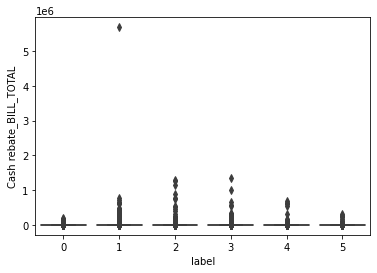

In [ ]:
sns.boxplot(high_value['label'], high_value['cash advance_BILL_TOTAL'])
plt.xlabel('label')
plt.ylabel('Cash rebate_BILL_TOTAL')

In [ ]:
predict_mean = high_value.groupby(['label']).mean()
predict_mean = predict_mean.drop(['Customer_id'],axis=1)
predict_mean['YearsAfterFirstContact']

label
0     1.000000
1     2.000000
2     3.199289
3     2.159172
4     7.129844
5    12.018248
Name: YearsAfterFirstContact, dtype: float64

In [ ]:
sns.boxplot(features['Cust_Segment'], features['YearsAfterFirstContact'])
plt.xlabel('YearsAfterFirstContact')
plt.ylabel('YearsAfterFirstContact')

NameError: ignored

In [ ]:
credit_card = features[features['credit_or_not'] == 1][features['Cust_Segment'] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'YearsAfterFirstContact')

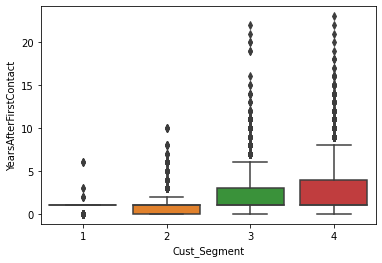

In [ ]:
sns.boxplot(credit_card['Cust_Segment'], credit_card['YearsAfterFirstContact'])
plt.xlabel('Cust_Segment')
plt.ylabel('YearsAfterFirstContact')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'YearsAfterFirstContact')

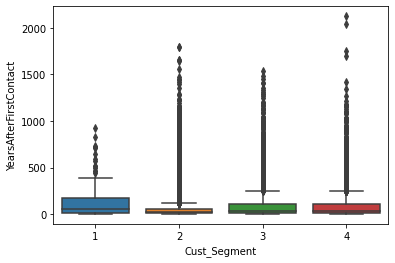

In [ ]:
sns.boxplot(credit_card['Cust_Segment'], credit_card['spending_trans_counts'])
plt.xlabel('Cust_Segment')
plt.ylabel('YearsAfterFirstContact')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'YearsAfterFirstContact')

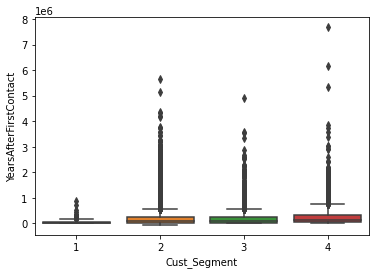

In [ ]:
sns.boxplot(credit_card['Cust_Segment'], credit_card['spending_BILL_TOTAL'])
plt.xlabel('Cust_Segment')
plt.ylabel('YearsAfterFirstContact')

In [ ]:
credit_card['Cust_Segment'].value_counts()

2    69413
3     6498
4     3718
1      212
Name: Cust_Segment, dtype: int64

In [ ]:
non_credit_card = features[features['credit_or_not'] == 0]

In [ ]:
credit_card['YearsAfterFirstContact'].fillna(0,inplace=True)
credit_card['spending_trans_counts'].fillna(0,inplace=True)
credit_card['spending_BILL_TOTAL'].fillna(0,inplace=True)

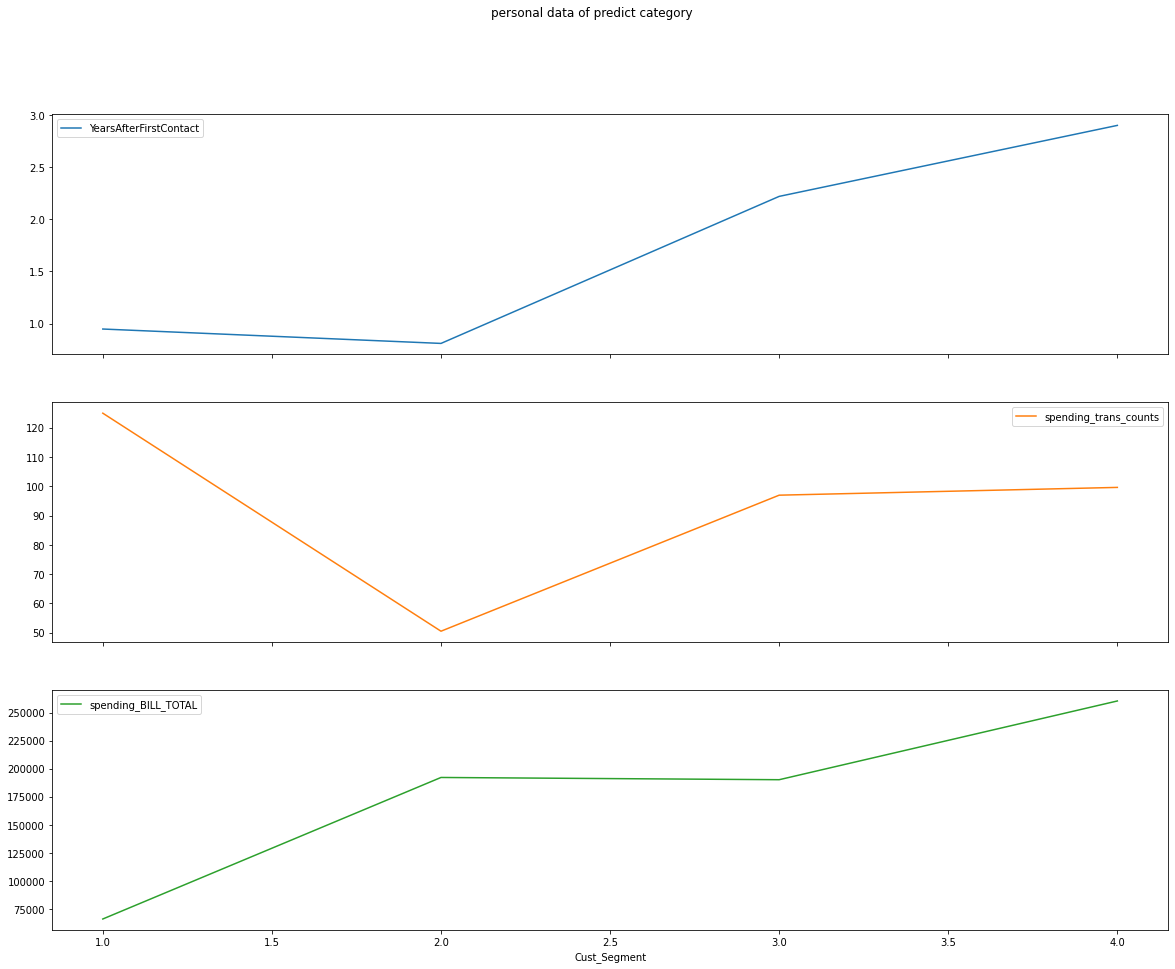

In [ ]:
axes = credit_card.groupby(['Cust_Segment']).mean()[['YearsAfterFirstContact', 'spending_trans_counts',\
        'spending_BILL_TOTAL']] \
        .plot.line(subplots=True, figsize=(20,15), title='personal data of predict category')

## RFM

In [ ]:
high_value = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data_with_probability.csv", sep=',')
high_value = high_value.drop(['Unnamed: 0'],axis=1)
high_value

,Customer_id,age,PBK_Ind,Gender,Cust_Segment,YearsAfterFirstContact,Attrition_or_not,InterCorpACIndicator,Number_Children,tenure,oversea_flag_prob,online_flag_prob,alipay_prob,tenpay_prob,applepay_prob,spending_trans_counts,spending_BILL_TOTAL,installment_trans_counts,installment_BILL_TOTAL,repayment_trans_counts,repayment_BILL_TOTAL,fee_trans_counts,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,Product_Code_QDUT,FUM_LCY_QDUT,Product_Code_Ins,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap,product_or_not,total_credit_counts,LR_Prob,clf_Prob,RF_Prob,XGB_Prob,LR_Prob_category,clf_Prob_category,RF_Prob_category,XGB_Prob_category,average_probability,average_probability_category,average_category,predict_category
0,500999800895910,38.0,1,1,5,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.069444,0.000000,60.0,83164.93,1.0,-43288.04,5.0,-37366.00,3.0,973.92,3.0,21644.04,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,72.0,0.003083,0.010319,0.00,0.009772,1.0,1.0,1.0,1.0,0.005793,1.0,1.00,1.0
1,500999800818899,30.0,0,1,2,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,88485.20,1.0,-15700.00,4.0,-89919.14,1.0,125.60,1.0,1308.34,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,10.0,0.073682,0.053394,0.02,0.048018,1.0,1.0,1.0,1.0,0.048773,1.0,1.00,1.0
2,500999801040158,31.0,0,1,2,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,64005.01,0.0,0.00,6.0,-32484.84,0.0,0.00,0.0,0.00,1.0,-157.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,15.0,0.012465,0.010319,0.00,0.006548,1.0,1.0,1.0,1.0,0.007333,1.0,1.00,1.0
3,500999800933280,24.0,0,0,2,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,28530.98,0.0,0.00,7.0,-17744.14,3.0,282.60,0.0,0.00,0.0,0.0,7.0,3023.100,3.0,14130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.014244,0.038349,0.00,0.045799,1.0,1.0,1.0,1.0,0.024598,1.0,1.00,1.0
4,500999801014287,30.0,0,1,2,0,0,0,0.0,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,29.0,27464.70,0.0,0.00,3.0,-4161.44,0.0,0.00,0.0,0.00,0.0,0.0,1.0,423.960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,33.0,0.050923,0.000000,0.00,0.008348,1.0,1.0,1.0,1.0,0.014818,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,500999800604403,31.0,0,1,4,2,0,0,0.0,2.0,0.000000,0.000000,0.038710,0.038710,0.000000,128.0,103988.71,3.0,-28147.12,14.0,-76192.10,4.0,201.84,4.0,4520.39,2.0,-188.4,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,155.0,0.000859,0.010319,0.00,0.002379,1.0,1.0,1.0,1.0,0.003389,1.0,1.00,1.0
83574,500999800692034,24.0,1,1,5,1,0,0,0.0,1.0,0.000000,0.000000,0.027273,0.027273,0.027273,193.0,299314.73,1.0,-12098.04,19.0,-290389.65,2.0,241.96,2.0,8065.37,3.0,-251.2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,905479.92,0.0,1.0,220.0,0.000005,0.010319,0.00,0.003375,1.0,1.0,1.0,1.0,0.003425,1.0,1.00,1.0
83575,500999800830863,61.0,0,1,2,1,0,0,1.0,1.0,0.164179,0.082090,0.082090,0.000000,0.000000,35.0,64001.18,3.0,-58732.82,16.0,-114621.33,35.0,3913.29,16.0,19220.86,0.0,0.0,12.0,7290.635,17.0,111470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,134.0,0.000807,0.010319,0.01,0.005926,1.0,1.0,1.0,1.0,0.006763,1.0,1.00,1.0
83576,500999801061071,24.0,1,0,2,0,0,0,0.0,0.0,0.000000,0.000000,0.148936,0.148936,0.148936,33.0,19442.79,1.0,-6148.12,2.0,-2198.00,4.0,147.98,3.0,768.48,2.0,-188.4,2.0,531.160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,47.0,0.003094,0.000000,0.00,0.003077,1.0,1.0,1.0,1.0,0.001543,1.0,1.00,1.0


In [ ]:
max_F = max(high_value['YearsAfterFirstContact'])
# high_value['R'] = (max_F - high_value['YearsAfterFirstContact']) / max_F
high_value['R'] = high_value['YearsAfterFirstContact'] / max_F
high_value['F'] = high_value['spending_trans_counts'] / max(high_value['spending_trans_counts'])
min_M = min(high_value['spending_BILL_TOTAL'])
high_value['M'] = (high_value['spending_BILL_TOTAL'] - min_M) / (max(high_value['spending_BILL_TOTAL']) - min_M)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
high_value = high_value[high_value['average_probability_category'] < 5]

In [ ]:
high_value['R'] = high_value['R'] * 0.731
high_value['F'] = high_value['F'] * 0.188
high_value['M'] = high_value['M'] * 0.081
high_value['RFM'] = high_value['R'] + high_value['F'] + high_value['M']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
high_value = high_value.merge(DDbalance, how = 'left', on = "Customer_id")
high_value = high_value.merge(TDbalance, how = 'left', on = "Customer_id")

In [ ]:
high_value['Balance RMB'].fillna(0,inplace=True)
high_value['LCYEOD_TD'].fillna(0,inplace=True)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
avg_R = np.mean(high_value['R'])
avg_F = np.mean(high_value['F'])
avg_M = np.mean(high_value['M'])

In [ ]:
print(avg_R, avg_F, avg_M)

0.06170857312927198 0.004861136043718249 0.002582933913838734


In [ ]:
# credit_card = credit_card[credit_card['M'] > avg_M]

In [ ]:
# credit_card1 = credit_card[credit_card['R'] > avg_R][credit_card['F'] > avg_F][credit_card['M'] > avg_M]

In [ ]:
# credit_card2 = credit_card[credit_card['R'] <= avg_R][credit_card['F'] > avg_F][credit_card['M'] > avg_M]

In [ ]:
# credit_card3 = credit_card[credit_card['R'] <= avg_R][credit_card['F'] <= avg_F][credit_card['M'] > avg_M]

In [ ]:
RFM = high_value[['R', 'F', 'M']]
kmeans = KMeans(n_clusters=6, random_state=0, max_iter=1000,init='k-means++').fit(RFM)
print(kmeans.cluster_centers_)

[[6.66133815e-16 1.83314318e-03 1.21340547e-03]
 [1.94822422e-01 1.24076040e-02 2.07386947e-03]
 [3.17826087e-02 3.64734413e-03 2.50419738e-03]
 [3.50188670e-01 1.29136843e-02 2.95253756e-03]
 [3.67872322e-02 4.26959982e-02 4.72591172e-03]
 [6.98992016e-02 7.86158506e-03 3.21538899e-03]]


In [ ]:
kmeans.cluster_centers_.sum(axis = 1)

array([0.00304655, 0.2093039 , 0.03793415, 0.36605489, 0.08420914,
       0.08097618])

In [ ]:
idx = np.argsort(kmeans.cluster_centers_.sum(axis = 1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(6)

In [ ]:
lut[kmeans.labels_]

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
high_value['label'] = lut[kmeans.labels_]

In [ ]:
high_value['label'].value_counts()

1    51317
0    19610
2     6771
3     2455
4     1471
5      548
Name: label, dtype: int64

In [ ]:
for i in kmeans.cluster_centers_:
  print(sum(i))

0.0030465486520552818
0.20930389537396993
0.037934150203506156
0.36605489215037873
0.08420914202474378
0.08097617565246822


In [ ]:
for i in kmeans.cluster_centers_:
  print(i > [avg_R, avg_F, avg_M])

[False False False]
[ True  True False]
[False False  True]
[ True  True  True]
[ True  True  True]
[ True  True  True]


## ANOVA

In [ ]:
from scipy.stats import f_oneway

In [ ]:
# d1 = high_value[high_value['label']==0][['R', 'F', 'M']]
# d2 = high_value[high_value['label']==1][['R', 'F', 'M']]
# d3 = high_value[high_value['label']==2][['R', 'F', 'M']]
# d4 = high_value[high_value['label']==3][['R', 'F', 'M']]
d5 = high_value[high_value['label']==4][['R', 'F', 'M']]
d6 = high_value[high_value['label']==5][['R', 'F', 'M']]
# d7 = high_value[high_value['label']==6][['R', 'F', 'M']]
# d8 = high_value[high_value['label']==7][['R', 'F', 'M']]
# d9 = high_value[high_value['label']==8][['R', 'F', 'M']]
# d10 = high_value[high_value['label']==9][['R', 'F', 'M']]

# args = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]
args = [d5,d6]

f,p = f_oneway(*args)
print(f,p)

[4.93688846e+03 2.82229700e-01 2.36286551e+01] [0.00000000e+00 5.95301998e-01 1.25858253e-06]


In [ ]:
for i in p:
  print('%.5f' % i)

0.00000
0.59530
0.00000


In [ ]:
# high_value.to_csv('/content/gdrive/MyDrive/Colab Notebooks/capstone/high_value.csv')

## Feature trends

In [ ]:
predict_mean = high_value.groupby(['label']).mean()
predict_mean = predict_mean.drop(['Customer_id'],axis=1)

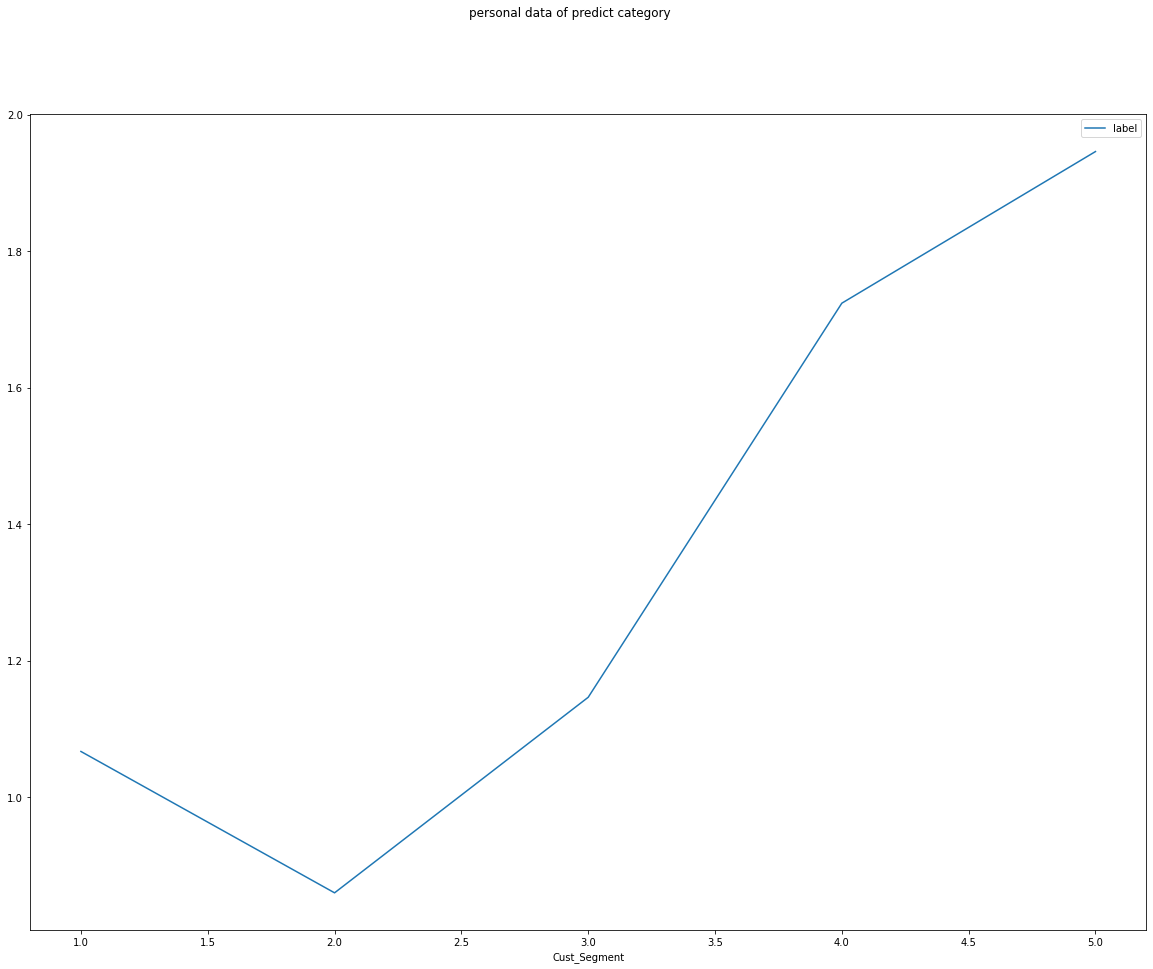

In [ ]:
axes = high_value.groupby(['Cust_Segment']).mean()[['label']] \
        .plot.line(subplots=True, figsize=(20,15), title='personal data of predict category')

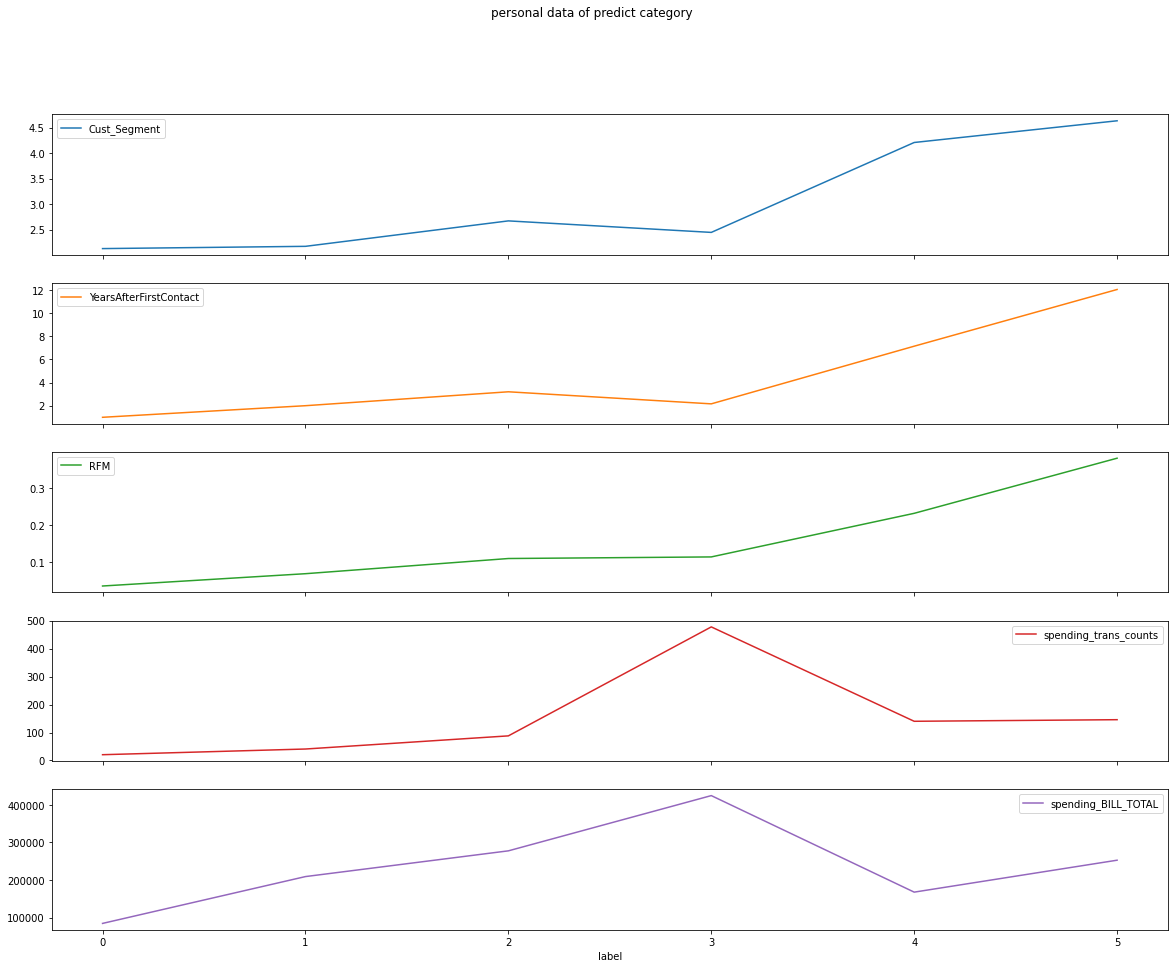

In [ ]:
axes = predict_mean[['Cust_Segment', 'YearsAfterFirstContact', 'RFM', 'spending_trans_counts',\
        'spending_BILL_TOTAL']] \
        .plot.line(subplots=True, figsize=(20,15), title='personal data of predict category')

In [ ]:
# , 'Balance RMB', 'LCYEOD_TD'

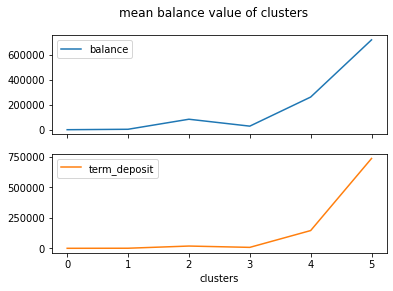

In [ ]:
(ax1, ax2) = predict_mean[['Balance RMB', 'LCYEOD_TD']] \
        .plot.line(subplots=True, title='mean balance value of clusters')
plt.xlabel('clusters')
ax1.legend(('balance',))
ax2.legend(('term_deposit',))
plt.show()

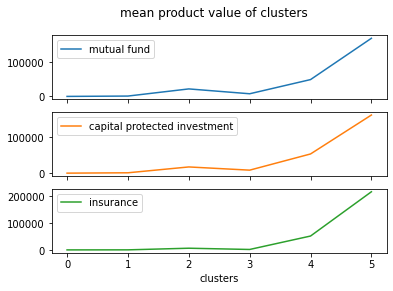

In [ ]:
(ax1, ax2, ax3) = predict_mean[['FUM_LCY_QDUT', 'MTDAVG_CPI', 'Market_Value_Ins']] \
        .plot.line(subplots=True, title='mean product value of clusters')
plt.xlabel('clusters')
ax1.legend(('mutual fund',))
ax2.legend(('capital protected investment',))
ax3.legend(('insurance',))
plt.show()

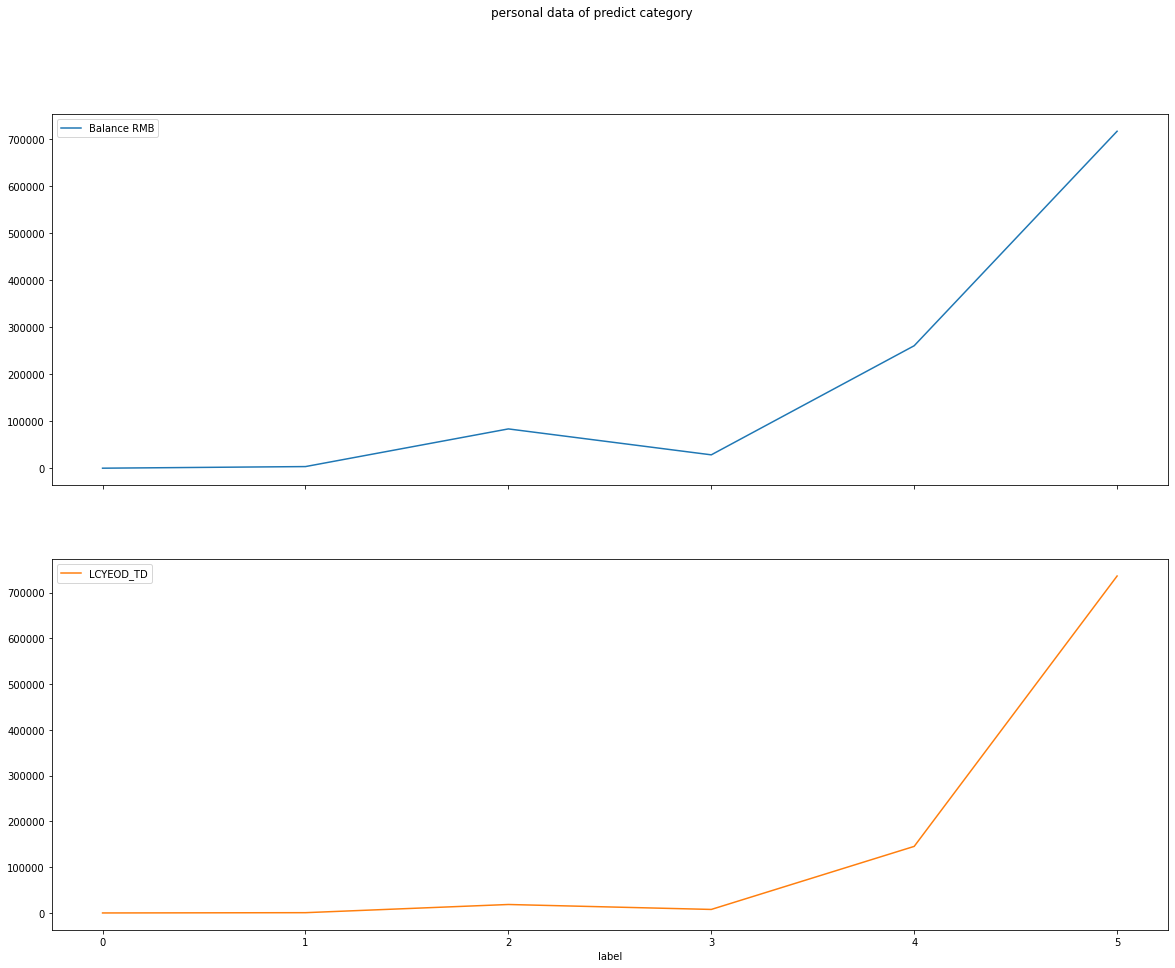

In [ ]:
axes = predict_mean[['Balance RMB', 'LCYEOD_TD']] \
        .plot.line(x = 'clusters', subplots=True, figsize=(20,15), title='mean personal data of clusters')

Text(0.5, 0, 'clusters')

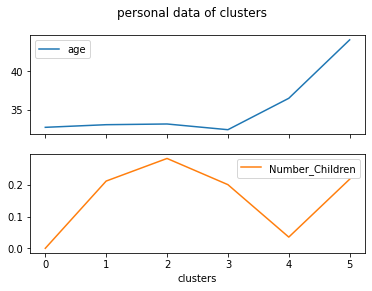

In [ ]:
axes = predict_mean[['age', 'Number_Children']] \
        .plot.line(subplots=True, title='personal data of clusters')
plt.xlabel('clusters')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'YearsAfterFirstContact')

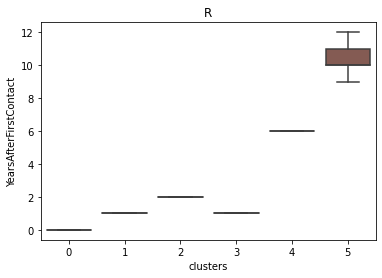

In [ ]:
sns.boxplot(high_value['label'], high_value['YearsAfterFirstContact'],showfliers=False)
plt.title('R')
plt.xlabel('clusters')
plt.ylabel('YearsAfterFirstContact')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_trans_counts')

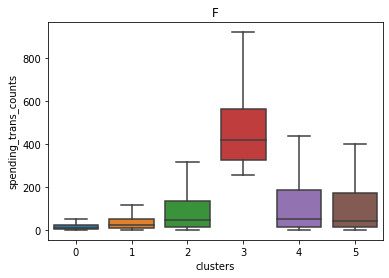

In [ ]:
sns.boxplot(high_value['label'], high_value['spending_trans_counts'],showfliers=False)
plt.title('F')
plt.xlabel('clusters')
plt.ylabel('spending_trans_counts')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_BILL_TOTAL')

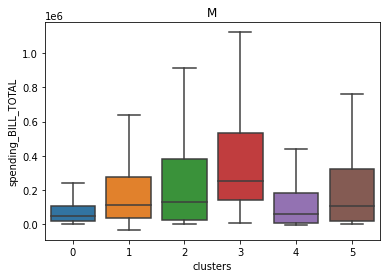

In [ ]:
sns.boxplot(high_value['label'], high_value['spending_BILL_TOTAL'],showfliers=False)
plt.title('M')
plt.xlabel('clusters')
plt.ylabel('spending_BILL_TOTAL')

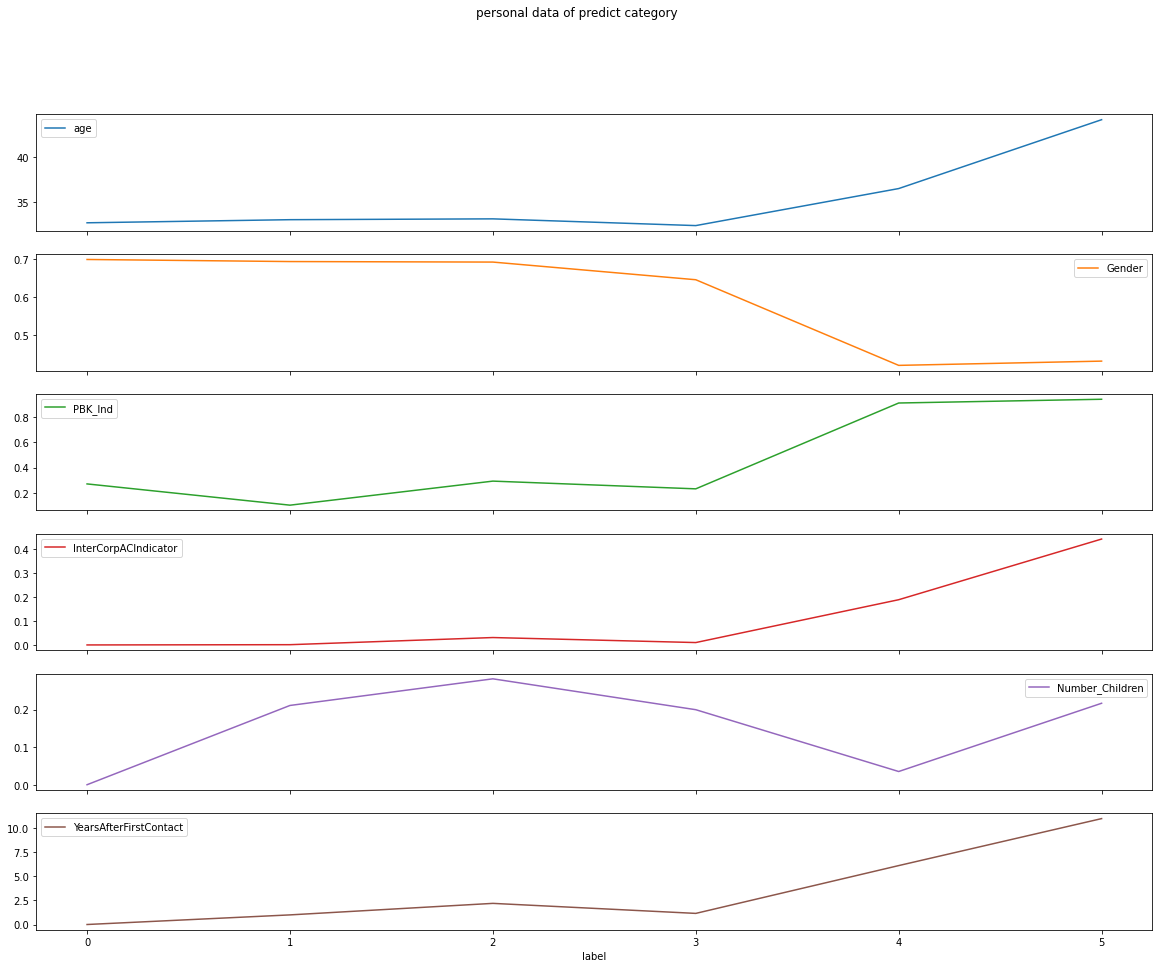

In [ ]:
axes = predict_mean[['age', 'Gender', 'PBK_Ind', 'InterCorpACIndicator', 'Number_Children', 'YearsAfterFirstContact']] \
        .plot.line(subplots=True, figsize=(20,15), title='personal data of predict category')

In [ ]:
# , 'spending_trans_counts',\
#        'spending_BILL_TOTAL', 'installment_trans_counts',\
#        'installment_BILL_TOTAL', 'repayment_trans_counts',\
#        'repayment_BILL_TOTAL', 'fee_trans_counts', 'fee_BILL_TOTAL',\
#        'others_trans_counts', 'others_BILL_TOTAL', 'Cash rebate_trans_counts',\
#        'Cash rebate_BILL_TOTAL', 'interest_trans_counts',\
#        'interest_BILL_TOTAL', 'cash advance_trans_counts',\
#        'cash advance_BILL_TOTAL'

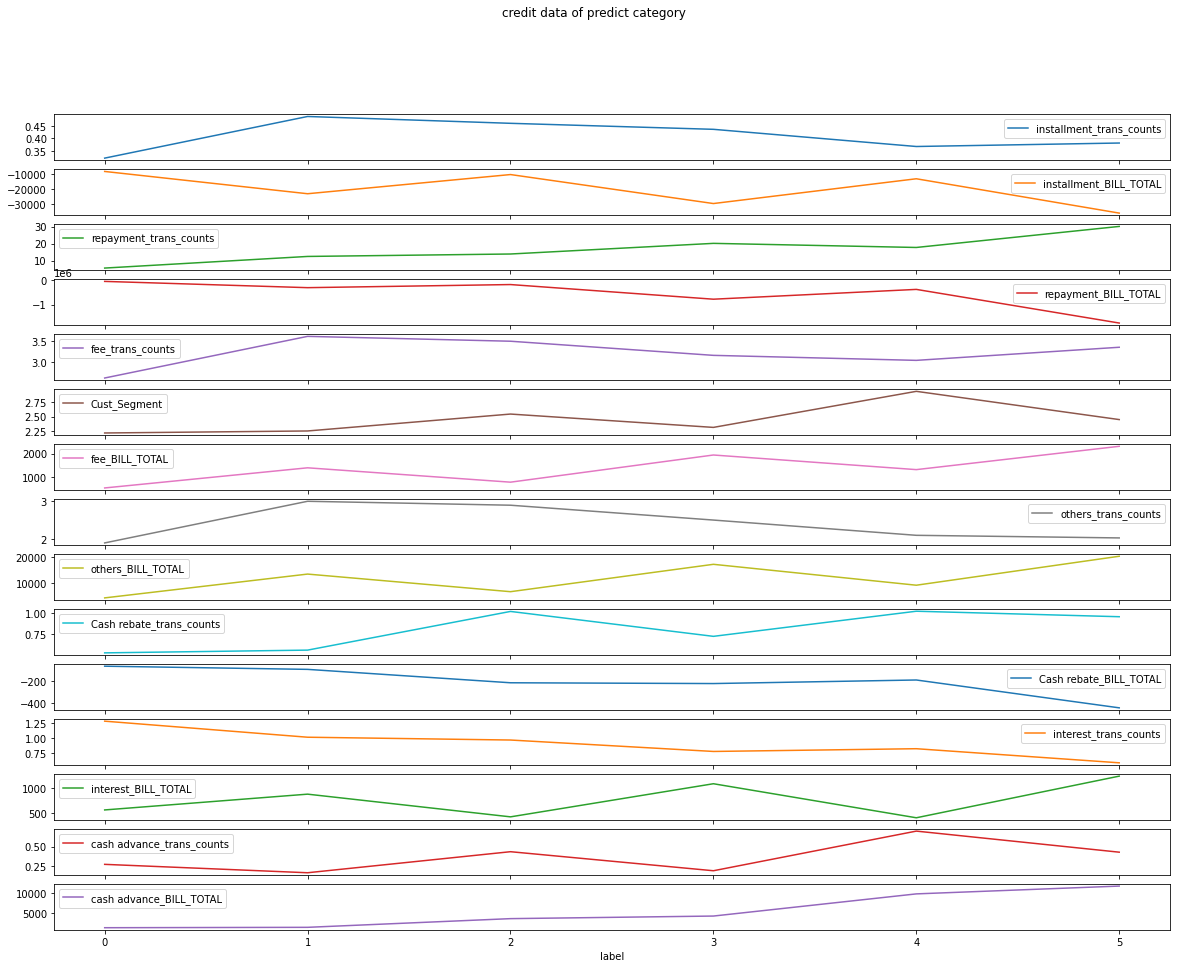

In [ ]:
axes = predict_mean[['installment_trans_counts',\
       'installment_BILL_TOTAL', 'repayment_trans_counts',\
       'repayment_BILL_TOTAL', 'fee_trans_counts', 'Cust_Segment', 'fee_BILL_TOTAL',\
       'others_trans_counts', 'others_BILL_TOTAL', 'Cash rebate_trans_counts',\
       'Cash rebate_BILL_TOTAL', 'interest_trans_counts',\
       'interest_BILL_TOTAL', 'cash advance_trans_counts',\
       'cash advance_BILL_TOTAL']] \
        .plot.line(subplots=True, figsize=(20,15), title='credit data of predict category')

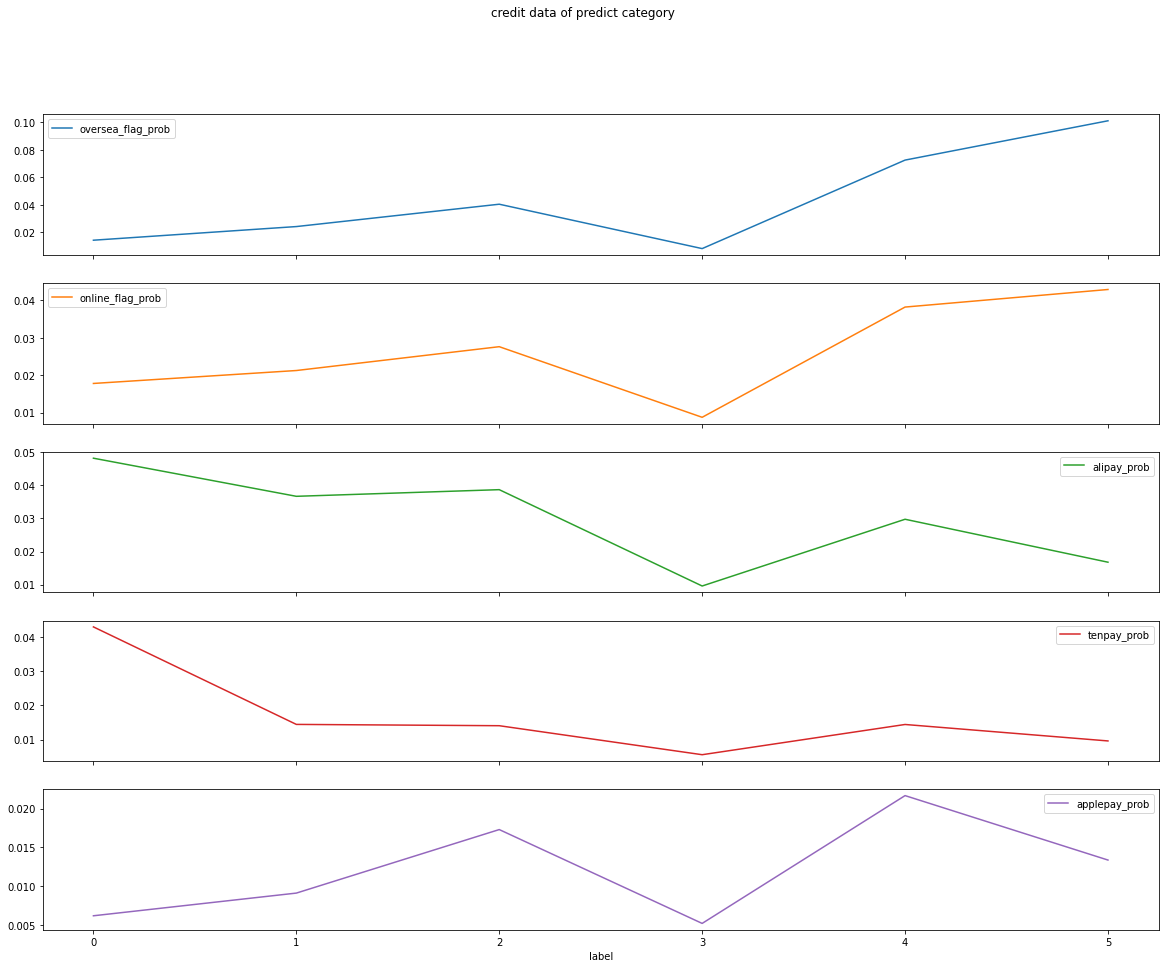

In [ ]:
axes = predict_mean[['oversea_flag_prob', 'online_flag_prob',\
       'alipay_prob', 'tenpay_prob', 'applepay_prob']] \
        .plot.line(subplots=True, figsize=(20,15), title='credit data of predict category')

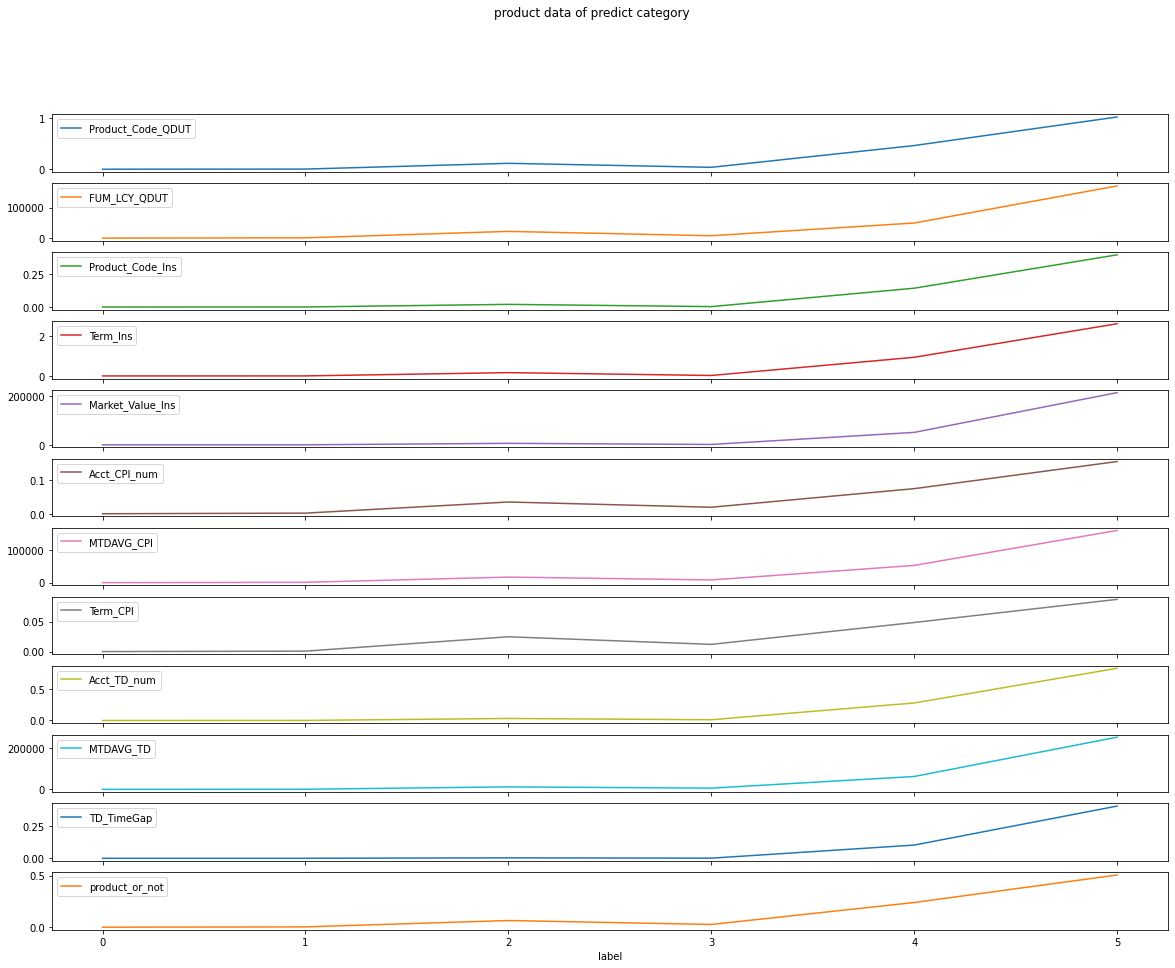

In [ ]:
axes = predict_mean[['Product_Code_QDUT', 'FUM_LCY_QDUT', 'Product_Code_Ins', 'Term_Ins', 'Market_Value_Ins', 'Acct_CPI_num', 'MTDAVG_CPI', 'Term_CPI', 'Acct_TD_num','MTDAVG_TD', 'TD_TimeGap', 'product_or_not']] \
        .plot.line(subplots=True, figsize=(20,15), title='product data of predict category')

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
features = ['age', 'installment_trans_counts',\
          
       'installment_BILL_TOTAL', 'repayment_trans_counts',\
       'repayment_BILL_TOTAL', 'fee_trans_counts', 'Cust_Segment', 'fee_BILL_TOTAL',\
       'others_trans_counts', 'others_BILL_TOTAL', 'Cash rebate_trans_counts',\
       'Cash rebate_BILL_TOTAL', 'interest_trans_counts',\
       'interest_BILL_TOTAL', 'cash advance_trans_counts',\
       'cash advance_BILL_TOTAL',\
       'Number_Children', 'oversea_flag_prob', 'online_flag_prob',\
       	'alipay_prob',	'tenpay_prob',	'applepay_prob', 'Balance RMB', 'LCYEOD_TD']

In [ ]:
# features = ['YearsAfterFirstContact']

In [ ]:
credit_card

,Customer_id,Cust_Segment,age,Gender,PBK_Ind,InterCorpACIndicator,YearsAfterFirstContact,IncomeLevel,Number_Children,oversea_flag_prob,online_flag_prob,alipay_prob,tenpay_prob,applepay_prob,spending_trans_counts,spending_BILL_TOTAL,installment_trans_counts,installment_BILL_TOTAL,repayment_trans_counts,repayment_BILL_TOTAL,fee_trans_counts,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,credit_or_not,Balance RMB,LCYEOD_TD,R,F,M,RFM,label
85,500999800653273,3,29.0,1.0,1,0,2,5,0.0,0.042061,0.031546,0.010515,0.010515,0.010515,869.0,1079406.420,7.0,-185627.50,25.0,-1244085.560,26.0,12456.12,21.0,184936.69,2.0,-144.500,NaN,NaN,1.0,141601.72,1.0,73016.12,0.0,0.063565,0.076953,0.011954,0.152472,0
153,500999800648706,2,40.0,1.0,0,0,2,5,2.0,0.000000,0.019231,0.019231,0.000000,0.019231,226.0,920089.380,NaN,NaN,30.0,-909825.460,2.0,6389.08,NaN,NaN,1.0,-62.800,1.0,956.100,NaN,NaN,1.0,0.00,0.0,0.063565,0.020013,0.010286,0.093865,0
156,500999800657790,2,33.0,1.0,0,0,2,6,1.0,0.000000,0.046729,0.046729,0.000000,0.000000,93.0,221482.780,NaN,NaN,9.0,-219966.290,2.0,169.97,NaN,NaN,1.0,-1570.000,2.0,1652.270,NaN,NaN,1.0,0.00,0.0,0.063565,0.008236,0.002975,0.074776,0
536,500999800595006,3,26.0,0.0,1,0,2,5,0.0,0.049624,0.033083,0.016541,0.000000,0.000000,614.0,259671.790,3.0,-88381.71,18.0,-288217.530,14.0,7009.07,11.0,94921.18,1.0,-161.265,2.0,100.455,2.0,12560.00,1.0,23936.82,0.0,0.063565,0.054372,0.003375,0.121312,0
566,500999800602501,4,37.0,1.0,1,0,2,8,0.0,0.000000,0.000000,0.032432,0.032432,0.000000,145.0,682564.540,2.0,-133722.40,20.0,-685182.380,9.0,3770.54,7.0,80223.55,2.0,-1601.400,NaN,NaN,NaN,NaN,1.0,0.00,0.0,0.063565,0.012840,0.007800,0.084206,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299486,500999800635600,2,29.0,1.0,0,0,2,5,0.0,0.021583,0.021583,0.021583,0.021583,0.021583,118.0,696310.910,NaN,NaN,19.0,-703152.760,2.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.0,0.063565,0.010449,0.007944,0.081959,0
299545,500999800651788,2,29.0,1.0,0,0,2,5,0.0,0.000000,0.000000,0.020548,0.020548,0.020548,132.0,388986.740,NaN,NaN,12.0,-299524.600,NaN,NaN,NaN,NaN,2.0,-94.200,NaN,NaN,NaN,NaN,1.0,0.00,0.0,0.063565,0.011689,0.004728,0.079982,0
299564,500999800645126,2,31.0,1.0,1,0,2,5,1.0,0.059829,0.000000,0.029915,0.029915,0.000000,402.0,316950.035,1.0,-25120.00,27.0,-373382.735,8.0,860.72,1.0,8373.34,3.0,-106.475,11.0,901.120,15.0,75481.97,1.0,0.00,0.0,0.063565,0.035599,0.003974,0.103138,0
299681,500999800662350,2,34.0,1.0,0,0,2,6,0.0,0.000000,0.022388,0.022388,0.022388,0.022388,121.0,1311135.210,NaN,NaN,12.0,-1154100.720,NaN,NaN,NaN,NaN,1.0,-62.800,NaN,NaN,NaN,NaN,1.0,0.00,0.0,0.063565,0.010715,0.014379,0.088659,0


In [ ]:
len(credit_card)

2527

In [ ]:
for i in features:
  print(i, len(credit_card[credit_card[i].isna()]))

age 0
Number_Children 0
oversea_flag_prob 0
online_flag_prob 0
alipay_prob 0
tenpay_prob 0
applepay_prob 0
Balance RMB 0
LCYEOD_TD 0


In [ ]:
X = credit_card[features]
y = credit_card['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'multi：softmax',
                            gamma = 0, 
                            learning_rate = 0.1, 
                            max_depth = 4, 
                            red_lambda = 0, 
                            scale_pos_weight = 1)
clf_xgb.fit(X_train, 
            y_train, 
            verbose = True, 
            early_stopping_rounds = 10, 
            eval_metric = 'mlogloss', 
            eval_set = [(X_test, y_test)])

[0]	validation_0-mlogloss:1.46198
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.34329
[2]	validation_0-mlogloss:1.24575
[3]	validation_0-mlogloss:1.16316
[4]	validation_0-mlogloss:1.0929
[5]	validation_0-mlogloss:1.03144
[6]	validation_0-mlogloss:0.977393
[7]	validation_0-mlogloss:0.930771
[8]	validation_0-mlogloss:0.889583
[9]	validation_0-mlogloss:0.853119
[10]	validation_0-mlogloss:0.820382
[11]	validation_0-mlogloss:0.791636
[12]	validation_0-mlogloss:0.765966
[13]	validation_0-mlogloss:0.742843
[14]	validation_0-mlogloss:0.722264
[15]	validation_0-mlogloss:0.703697
[16]	validation_0-mlogloss:0.686931
[17]	validation_0-mlogloss:0.671881
[18]	validation_0-mlogloss:0.658115
[19]	validation_0-mlogloss:0.6457
[20]	validation_0-mlogloss:0.634154
[21]	validation_0-mlogloss:0.62365
[22]	validation_0-mlogloss:0.614283
[23]	validation_0-mlogloss:0.605527
[24]	validation_0-mlogloss:0.597339
[25]	validation_0-mlogloss:0.590137
[26]	validation

XGBClassifier(max_depth=4, objective='multi:softprob', red_lambda=0)

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

In [ ]:
y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8081546458739441

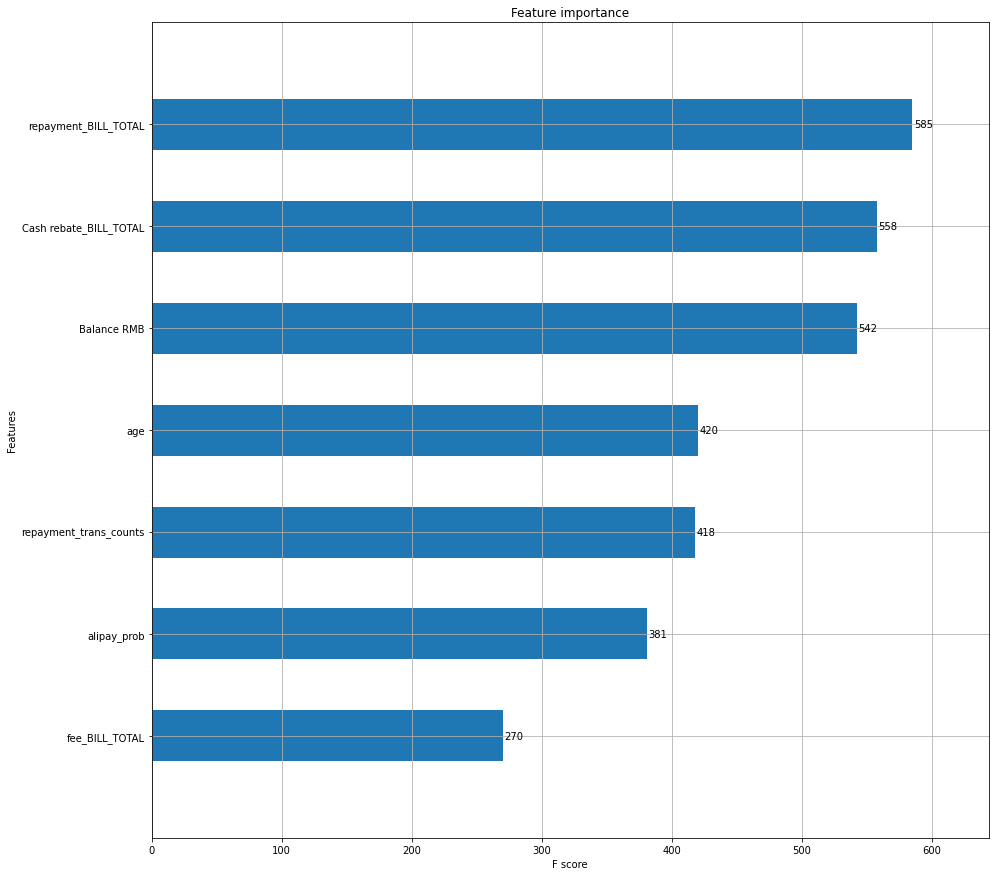

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (15, 15))
plot_importance(clf_xgb, 
                height = 0.5,
                ax = ax,
               max_num_features = 7)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
roc_auc_score(y_test, y_pred)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[   8,  524,    0,    0,    0],
       [  10, 4581,   65,    3,    3],
       [   2,  607,  185,   25,    5],
       [   0,    7,   62,   13,    6],
       [   0,    0,   26,   12,   12]])

In [ ]:
plot_confusion_matrix(y_test, 
                      y_pred, 
                      values_format = 'd',
                      display_labels = [0, 1, 2, 3, 4])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


TypeError: ignored

## Plots

In [ ]:
import seaborn as sns

Text(0, 0.5, 'spending_BILL_TOTAL')

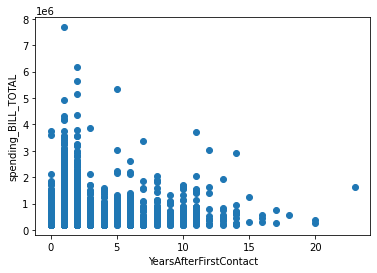

In [ ]:
plt.scatter(credit_card['YearsAfterFirstContact'], credit_card['spending_BILL_TOTAL'])
plt.xlabel('YearsAfterFirstContact')
plt.ylabel('spending_BILL_TOTAL')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_BILL_TOTAL')

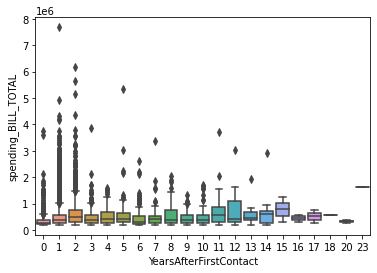

In [ ]:
sns.boxplot(credit_card['YearsAfterFirstContact'], credit_card['spending_BILL_TOTAL'])
plt.xlabel('YearsAfterFirstContact')
plt.ylabel('spending_BILL_TOTAL')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_trans_counts')

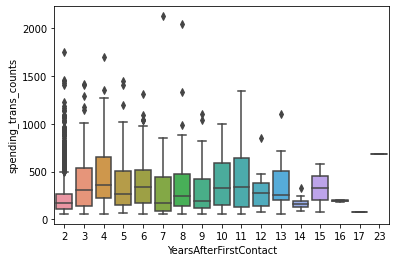

In [ ]:
sns.boxplot(credit_card['YearsAfterFirstContact'], credit_card['spending_trans_counts'])
plt.xlabel('YearsAfterFirstContact')
plt.ylabel('spending_trans_counts')

In [ ]:
high_value['label'].value_counts()

1    51279
0    19607
2     6754
3     2513
4     1471
5      548
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

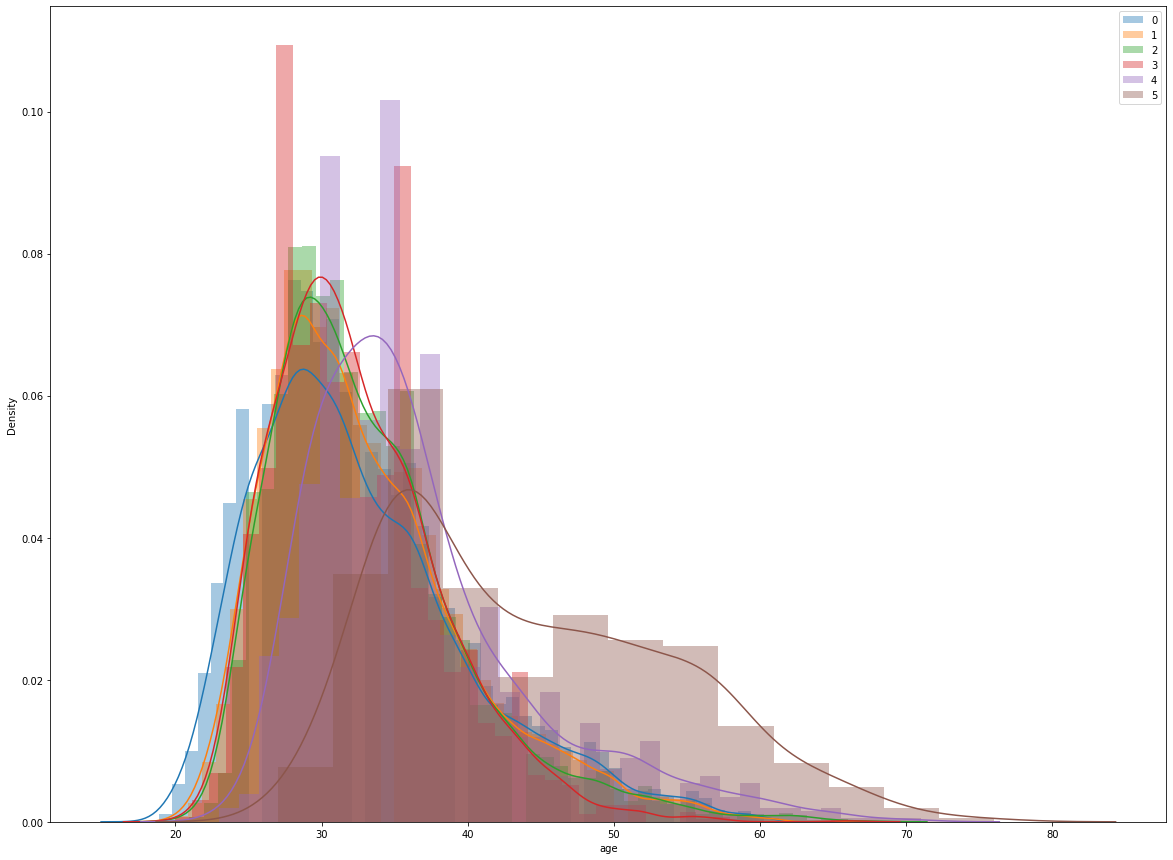

In [ ]:
plt.figure(figsize = (20, 15))
for i in range(0, 6):
  sns.distplot(high_value[high_value['label'] == i]['age'], label = str(i))
  plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

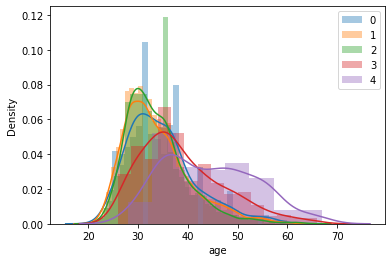

In [ ]:
for i in range(0, 5):
  sns.distplot(credit_card[credit_card['label'] == i]['age'], label = str(i))
  plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

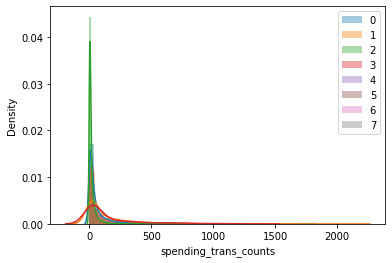

In [ ]:
for i in range(0, 8):
  sns.distplot(credit_card[credit_card['label'] == i]['spending_trans_counts'], label = str(i))
  plt.legend()

In [ ]:
# fig, ax = plt.subplots(figsize = (15, 15))
# plot_importance(clf_xgb, 
#                 height = 0.5,
#                 ax = ax,
#                max_num_features = 15)

In [ ]:
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d

Text(0, 0.5, 'F')

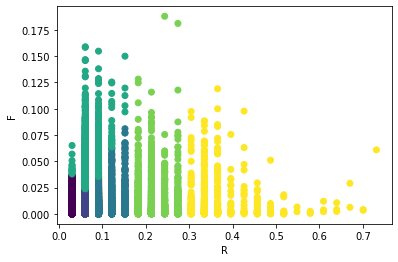

In [ ]:
plt.scatter(high_value['R'], high_value['F'], c = high_value['label'])
plt.xlabel('R')
plt.ylabel('F')

Text(0, 0.5, 'F')

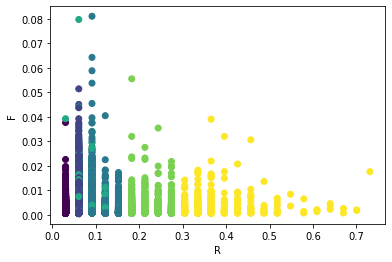

In [ ]:
plt.scatter(high_value['R'], high_value['M'], c = high_value['label'])
plt.xlabel('R')
plt.ylabel('F')

Text(0, 0.5, 'F')

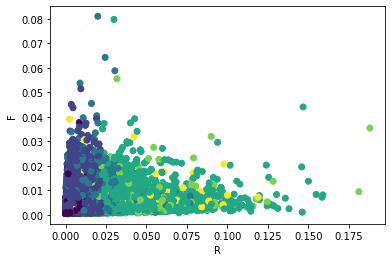

In [ ]:
plt.scatter(high_value['F'], high_value['M'], c = high_value['label'])
plt.xlabel('R')
plt.ylabel('F')

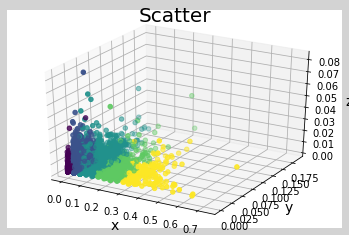

In [ ]:
mp.figure('Scatter', facecolor = 'lightgray')
ax3d = mp.gca(projection = '3d')
mp.title('Scatter', fontsize = 20)
x = credit_card['R']
y = credit_card['F']
z = credit_card['M']
d = credit_card['label']
ax3d.set_xlabel('x', fontsize = 14)
ax3d.set_ylabel('y', fontsize = 14)
ax3d.set_zlabel('z', fontsize = 14)
mp.tick_params(labelsize = 10)
ax3d.scatter(x, y, z, c = d)
mp.show()

## KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
X = high_value[['R', 'F', 'M']]
y = high_value['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [ ]:
X_train

,YearsAfterFirstContact
263859,0
161076,3
179087,1
133066,0
98371,1
...,...
243804,1
265117,1
35430,0
37986,1


In [ ]:
clf = KNeighborsClassifier(n_neighbors = 30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.999415859416833

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 4902     0     0     0     0     0]
 [    0 12818     0     2     0     0]
 [    0     0  1688     0     0     0]
 [    2     8     0   618     0     0]
 [    0     0     0     0   368     0]
 [    0     0     0     0     0   137]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4902
           1       1.00      1.00      1.00     12820
           2       1.00      1.00      1.00      1688
           3       1.00      0.98      0.99       628
           4       1.00      1.00      1.00       368
           5       1.00      1.00      1.00       137

    accuracy                           1.00     20543
   macro avg       1.00      1.00      1.00     20543
weighted avg       1.00      1.00      1.00     20543

